# Python Pandas Tutorial: A Complete Introduction for Beginners

## What's Pandas for?

Pandas has so many uses that it might make sense to list the things it can't do instead of what it can do. 

This tool is essentially your data’s home. Through pandas, you get acquainted with your data by cleaning, transforming, and analyzing it. 

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

- Calculate statistics and answer questions about the data, like


    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?


- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria


- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 


- Store the cleaned, transformed data back into a CSV, other file or database


Before you jump into the modeling or the complex visualizations you need to have a good understanding of the nature of your dataset and pandas is the best avenue through which to do that.



In [1]:
import pandas as pd

Now to the basic components of pandas.

## Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

<img src="series-and-dataframe.png" width=600px />

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

You'll see how these components work when we start working with data below. 

### Reading data from CSVs

With CSV files all you need is a single line to load in the data:

CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [2]:
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

We're loading this dataset from a CSV and designating the movie titles to be our index.

### Viewing your data

The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference. We accomplish this with `.head()`:

In [3]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


`.head()` outputs the **first** five rows of your DataFrame by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example. 

To see the **last** five rows use `.tail()`. `tail()` also accepts a number, and in this case we printing the bottom two rows.:

In [4]:
movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


Typically when we load in a dataset, we like to view the first five or so rows to see what's under the hood. Here we can see the names of each column, the index, and examples of values in each row.

You'll notice that the index in our DataFrame is the *Title* column, which you can tell by how the word *Title* is slightly lower than the rest of the columns.

### Getting info about your data

`.info()` should be one of the very first commands you run after loading your data:

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


`.info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using. 

Notice in our movies dataset we have some obvious missing values in the `Revenue` and `Metascore` columns. We'll look at how to handle those in a bit.

In [6]:
movies_df.shape

(1000, 11)

Note that `.shape` has no parentheses and is a simple tuple of format (rows, columns). So we have **1000 rows** and **11 columns** in our movies DataFrame.

You'll be going to `.shape` a lot when cleaning and transforming data. For example, you might filter some rows based on some criteria and then want to know quickly how many rows were removed.

### Handling duplicates

This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows. 

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself:

In [7]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(2000, 11)

Using `append()` will return a copy without affecting the original DataFrame. We are capturing this copy in `temp` so we aren't working with the real data.

Notice call `.shape` quickly proves our DataFrame rows have doubled.

Now we can try dropping duplicates:

In [8]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

Just like `append()`, the `drop_duplicates()` method will also return a copy of your DataFrame, but this time with duplicates removed. Calling `.shape` confirms we're back to the 1000 rows of our original dataset.

It's a little verbose to keep assigning DataFrames to the same variable like in this example. For this reason, pandas has the `inplace` keyword argument on many of its methods. Using `inplace=True` will modify the DataFrame object in place:

In [9]:
temp_df.drop_duplicates(inplace=True)

Now our `temp_df` *will* have the transformed data automatically. 

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:

* `first`: (default) Drop duplicates except for the first occurrence.
* `last`: Drop duplicates except for the last occurrence.
* `False`: Drop all duplicates.

Since we didn't define the `keep` arugment in the previous example it was defaulted to `first`. This means that if two rows are the same pandas will drop the second row and keep the first row. Using `last` has the opposite effect: the first row is dropped.

`keep`, on the other hand, will drop all duplicates. If two rows are the same then both will be dropped. Watch what happens to `temp_df`:

In [10]:
temp_df = movies_df.append(movies_df)  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 11)

Since all rows were duplicates, `keep=False` dropped them all resulting in zero rows being left over. If you're wondering why you would want to do this, one reason is that it allows you to locate all duplicates in your dataset. When conditional selections are shown below you'll see how to do that.

### Column cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

Here's how to print the column names of our dataset:

In [11]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Not only does `.columns` come in handy if you want to rename columns by allowing for simple copy and paste, it's also useful if you need to understand why you are receiving a `Key Error` when selecting data by column.

We can use the `.rename()` method to rename certain or all columns via a `dict`. We don't want parentheses, so let's rename those:

In [12]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

Excellent. But what if we want to lowercase all names? Instead of using `.rename()` we could also set a list of names to the columns like so:

In [13]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

But that's too much work. Instead of just renaming each column manually we can do a list comprehension:

In [14]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

`list` (and `dict`) comprehensions come in handy a lot when working with pandas and data in general.

It's a good idea to lowercase, remove special characters, and replace spaces with underscores if you'll be working with a dataset for some time.

### How to work with missing values

When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which are handled differently in some situations.

There are two options in dealing with nulls: 

1. Get rid of rows or columns with nulls
2. Replace nulls with non-null values, a technique known as **imputation**

Let's calculate to total number of nulls in each column of our dataset. The first step is to check which cells in our DataFrame are null:

In [15]:
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


Notice `isnull()` returns a DataFrame where each cell is either True or False depending on that cell's null status.

To count the number of nulls in each column we use an aggregate function for summing: 

In [16]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

`.isnull()` just by iteself isn't very useful, and is usually used in conjunction with other methods, like `sum()`.

We can see now that our data has **128** missing values for `revenue_millions` and **64** missing values for `metascore`.

#### Removing null values

Data Scientists and Analysts regularly face the dilemma of dropping or imputing null values, and is a decision that requires intimate knowledge of your data and its context. Overall, removing null data is only suggested if you have a small amount of missing data.

Remove nulls is pretty simple:

In [17]:
movies_df.dropna()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


This operation will delete any **row** with at least a single null value, but it will return a new DataFrame without altering the original one. You could specify `inplace=True` in this method as well.

So in the case of our dataset, this operation would remove 128 rows where `revenue_millions` is null and 64 rows where `metascore` is null. This obviously seems like a waste since there's perfectly good data in the other columns of those dropped rows. That's why we'll look at imputation next.

Other than just dropping rows, you can also drop columns with null values by setting `axis=1`:

In [18]:
movies_df.dropna(axis=1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


In our dataset, this operation would drop the `revenue_millions` and `metascore` columns.

**Intuition side note**: What's with this `axis=1` parameter?

It's not immediately obvious where `axis` comes from and why you need it to be 1 for it to affect columns. To see why, just look at the `.shape` output:

In [19]:
movies_df.shape

(1000, 11)

As we learned above, this is a tuple that represents the shape of the DataFrame, i.e. 1000 rows and 11 columns. Note that the *rows* are at index zero of this tuple and *columns* are at **index one** of this tuple. This is why `axis=1` affects columns. This comes from NumPy, and is a great example of why learning NumPy is worth your time.

### Imputation

Imputation is a conventional feature engineering technique used to keep valuable data that have null values. 

There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the **mean** or the **median** of that column. 

Let's look at imputing the missing values in the `revenue_millions` column. First we'll extract that column into its own variable:

In [20]:
revenue = movies_df['revenue_millions']

Using square brackets is the general way we select columns in a DataFrame. 

If you remember back to when we created DataFrames from scratch, the keys of the `dict` ended up as column names. Now when we select columns of a DataFrame, we use brackets just like if we were accessing a Python dictionary. 

`revenue` now contains a Series:

In [21]:
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

Slightly different formatting than a DataFrame, but we still have our `Title` index. 

We'll impute the missing values of revenue using the mean. Here's the mean value:

In [22]:
revenue_mean = revenue.mean()

revenue_mean

82.95637614678897

With the mean, let's fill the nulls using `fillna()`:

In [23]:
revenue.fillna(revenue_mean, inplace=True)

We have now replaced all nulls in `revenue` with the mean of the column. Notice that by using `inplace=True` we have actually affected the original `movies_df`:

In [24]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Imputing an entire column with the same value like this is a basic example. It would be a better idea to try a more granular imputation by Genre or Director. 

For example, you would find the mean of the revenue generated in each genre individually and impute the nulls in each genre with that genre's mean.

Let's now look at more ways to examine and understand the dataset.

### Understanding your variables

Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [25]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Understanding which numbers are continuous also comes in handy when thinking about the type of plot to use to represent your data visually. 

`.describe()` can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category:

In [26]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

This tells us that the genre column has 207 unique values, the top value is Action/Adventure/Sci-Fi, which shows up 50 times (freq).

`.value_counts()` can tell us the frequency of all values in a column:

In [27]:
movies_df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

#### Relationships between continuous variables

By using the correlation method `.corr()` we can generate the relationship between each continuous variable:

In [28]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


Correlation tables are a numerical representation of the bivariate relationships in the dataset. 

Positive numbers indicate a positive correlation — one goes up the other goes up — and negative numbers represent an inverse correlation — one goes up the other goes down. 1.0 indicates a perfect correlation. 

So looking in the first row, first column we see `rank` has a perfect correlation with itself, which is obvious. On the other hand, the correlation between `votes` and `revenue_millions` is 0.6. A little more interesting.

Examining bivariate relationships comes in handy when you have an outcome or dependent variable in mind and would like to see the features most correlated to the increase or decrease of the outcome. You can visually represent bivariate relationships with scatterplots (seen below in the plotting section). 

For a deeper look into data summarizations check out [Essential Statistics for Data Science](https://www.learndatasci.com/tutorials/data-science-statistics-using-python/).

Let's now look more at manipulating DataFrames.

### DataFrame slicing, selecting, extracting

Up until now we've focused on some basic summaries of our data. We've learned about simple column extraction using single brackets, and we imputed null values in a column using `fillna()`. Below are the other methods of slicing, selecting, and extracting you'll need to use constantly.

It's important to note that, although many methods are the same, DataFrames and Series have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors. 

Let's look at working with columns first.

#### By column

You already saw how to extract a column using square brackets like this:

In [29]:
genre_col = movies_df['genre']

type(genre_col)

pandas.core.series.Series

This will return a *Series*. To extract a column as a *DataFrame*, you need to pass a list of column names. In our case that's just a single column:

In [30]:
genre_col = movies_df[['genre']]

type(genre_col)

pandas.core.frame.DataFrame

Since it's just a list, adding another column name is easy:

In [31]:
subset = movies_df[['genre', 'rating']]

subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


Now we'll look at getting data by rows.

#### By rows

For rows, we have two options: 

- `.loc` - **loc**ates by name
- `.iloc`- **loc**ates by numerical **i**ndex

Remember that we are still indexed by movie Title, so to use `.loc` we give it the Title of a movie:

In [32]:
prom = movies_df.loc["Prometheus"]

prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

On the other hand, with `iloc` we give it the numerical index of Prometheus:

In [33]:
prom = movies_df.iloc[1]

`loc` and `iloc` can be thought of as similar to Python `list` slicing. To show this even further, let's select multiple rows.

How would you do it with a list? In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in pandas:

In [34]:
movie_subset = movies_df.loc['Prometheus':'Sing']

movie_subset = movies_df.iloc[1:4]

movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


One important distinction between using `.loc` and `.iloc` to select multiple rows is that `.loc` includes the movie *Sing* in the result, but when using `.iloc` we're getting rows 1:4 but the movie at index 4 (*Suicide Squad*) is not included. 

Slicing with `.iloc` follows the same rules as slicing with lists, the object at the index at the end is not included.

#### Conditional selections
We’ve gone over how to select columns and rows, but what if we want to make a conditional selection? 

For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [35]:
condition = (movies_df['director'] == "Ridley Scott")

condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

Similar to `isnull()`, this returns a Series of True and False values: True for films directed by Ridley Scott and False for ones not directed by him. 

We want to filter out all movies not directed by Ridley Scott, in other words, we don’t want the False films. To return the rows where that condition is True we have to pass this operation into the DataFrame:

In [36]:
movies_df[movies_df['director'] == "Ridley Scott"].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


You can get used to looking at these conditionals by reading it like: 

> Select movies_df where movies_df director equals Ridley Scott

Let's look at conditional selections using numerical values by filtering the DataFrame by ratings:

In [37]:
movies_df[movies_df['rating'] >= 8.6].head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


We can make some richer conditionals by using logical operators `|` for "or" and `&` for "and".

Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [38]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


We need to make sure to group evaluations with parentheses so Python knows how to evaluate the conditional.

Using the `isin()` method we could make this more concise though:

In [39]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Let's say we want all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

Here's how we could do all of that:

In [40]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


If you recall up when we used `.describe()` the 25th percentile for revenue was about 17.4, and we can access this value directly by using the `quantile()` method with a float of 0.25.

So here we have only four movies that match that criteria.

## Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [41]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what `apply()` does:

In [42]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


The `.apply()` method passes every value in the `rating` column through the `rating_function` and then returns a new Series. This Series is then assigned to a new column called `rating_category`.

You can also use anonymous functions as well. This lambda function achieves the same result as `rating_function`:

In [43]:
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


Overall, using `apply()` will be much faster than iterating manually over rows because pandas is utilizing vectorization.

> Vectorization: a style of computer programming where operations are applied to whole arrays instead of individual elements —[Wikipedia](https://en.wikipedia.org/wiki/Vectorization)

A good example of high usage of `apply()` is during natural language processing (NLP) work. You'll need to apply all sorts of text cleaning functions to strings to prepare for machine learning.

## Brief Plotting

Another great thing about pandas is that it integrates with Matplotlib, so you get the ability to plot directly off DataFrames and Series. To get started we need to import Matplotlib (`pip install matplotlib`):

In [44]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

Now we can begin. There won't be a lot of coverage on plotting, but it should be enough to explore you're data easily.

**Side note:**
For categorical variables utilize Bar Charts* and Boxplots.  For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.

Let's plot the relationship between ratings and revenue. All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot:

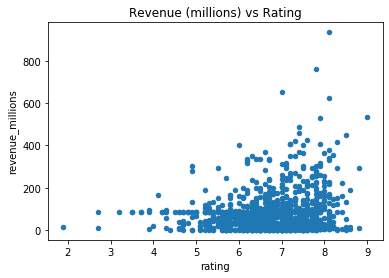

In [45]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

What's with the semicolon? It's not a syntax error, just a way to hide the `<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18>` output when plotting in Jupyter notebooks.

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

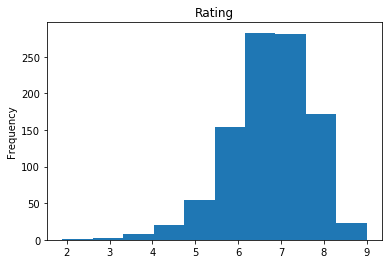

In [46]:
movies_df['rating'].plot(kind='hist', title='Rating');

Do you remember the `.describe()` example at the beginning of this tutorial? Well, there's a graphical representation of the interquartile range, called the Boxplot. Let's recall what `describe()` gives us on the ratings column:

In [47]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

Using a Boxplot we can visualize this data:

## Wrapping up

Exploring, cleaning, transforming, and visualization data with pandas in Python is an essential skill in data science. Just cleaning wrangling data is 80% of your job as a Data Scientist. After a few projects and some practice, you should be very comfortable with most of the basics.

To keep improving, view the [extensive tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) offered by the official pandas docs, follow along with a few [Kaggle kernels](https://www.kaggle.com/kernels), and keep working on your own projects!